In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#Data Exploration
###Let's load the dataset and take a look at the first few rows to understand its structure.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/linear-reg/House-price/Data/real_estate_dataset.csv')
data_main = data.copy()

In [ ]:
data.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [ ]:
data.isnull().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


In [ ]:
data.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [ ]:
data.isna().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


In [ ]:
data.shape

(500, 12)

#Data Visualization
###Let's visualize the relationships between different features and the price using various plots.

In [ ]:
data.drop(columns=['ID'], inplace=True)

In [ ]:
data.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


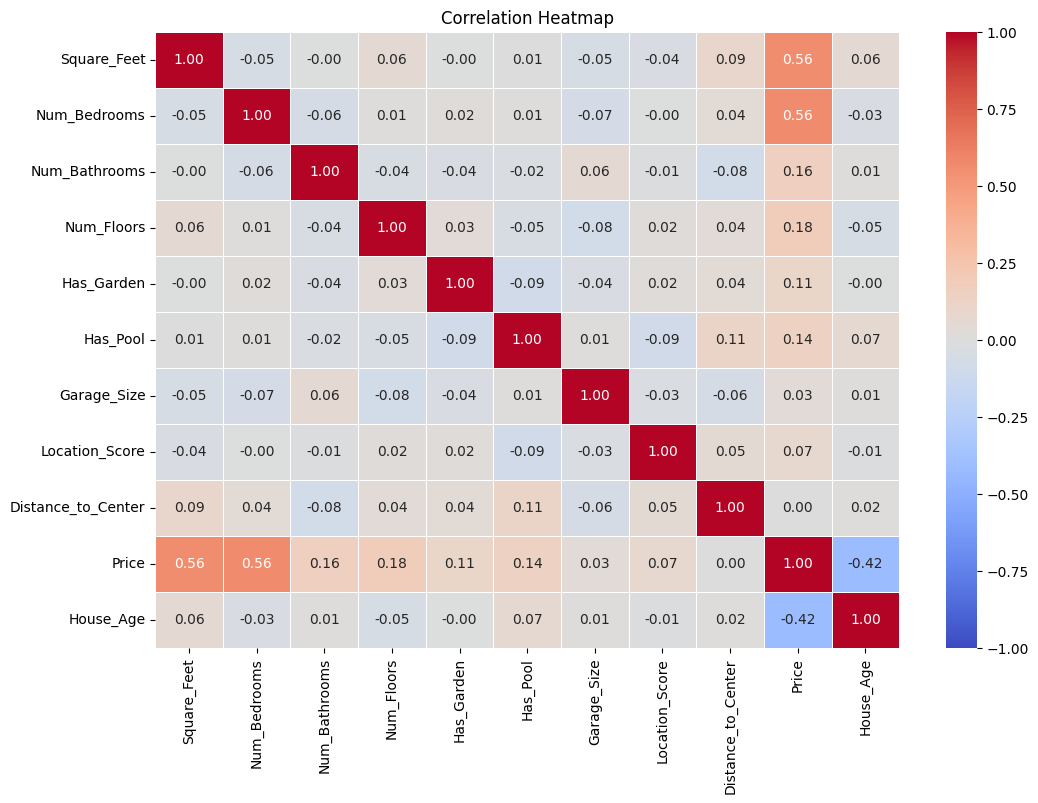

In [ ]:
# Correlation Heatmap
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot = True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

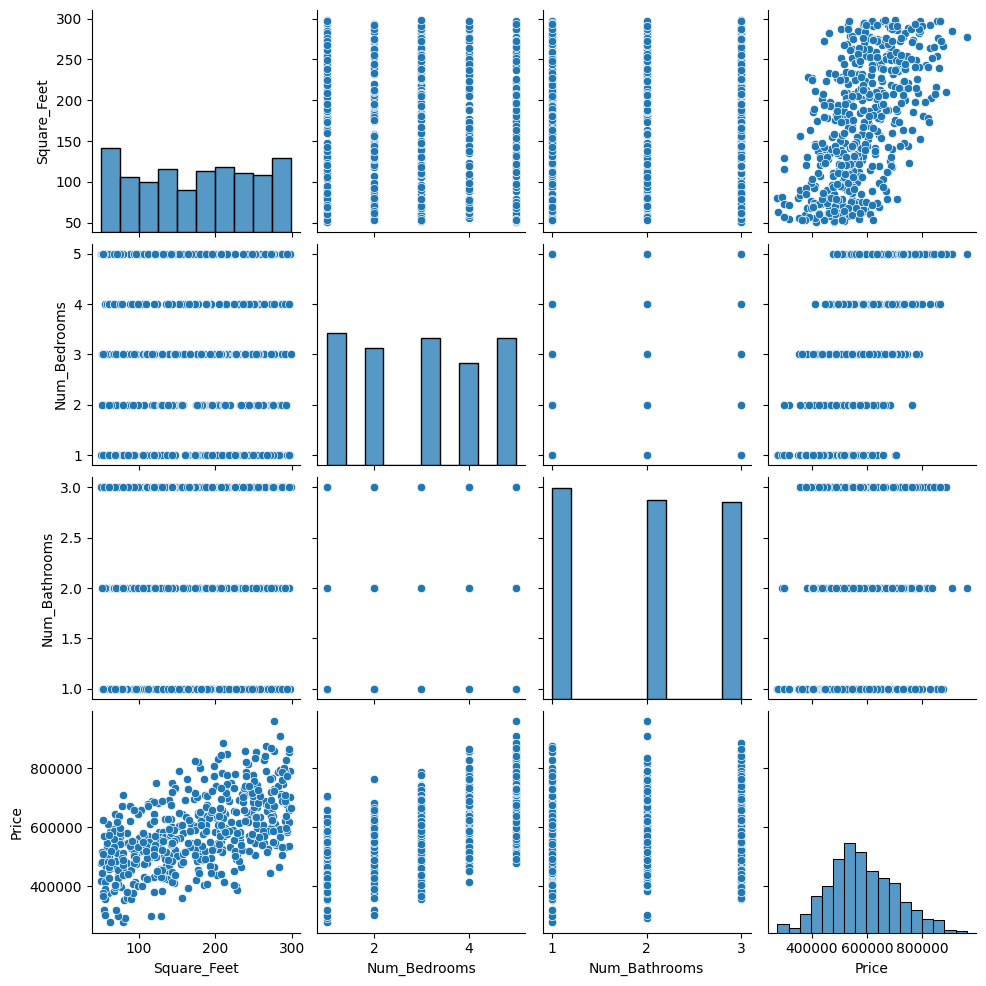

In [ ]:
# Pair Plot
sns.pairplot(data[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Price']])
plt.show()

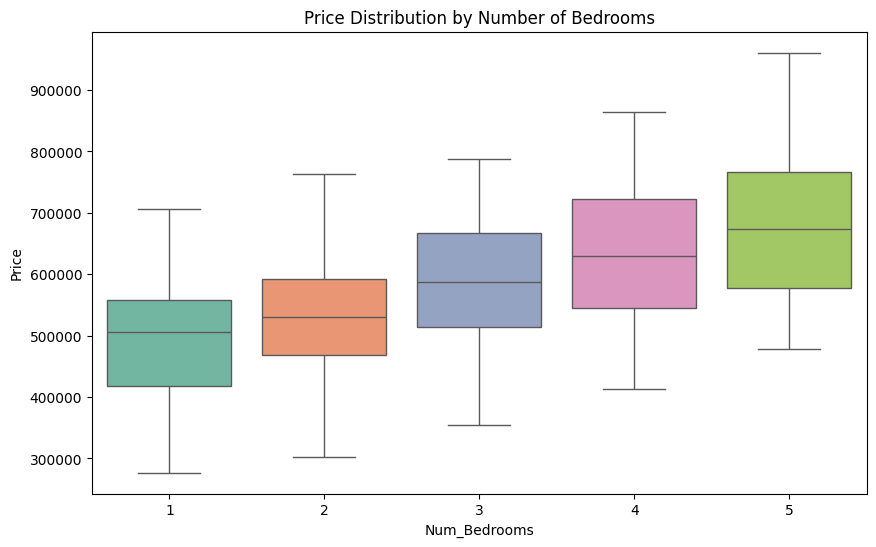

In [ ]:
# Box Plot for Price
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'Num_Bedrooms', y = 'Price',palette='Set2' )
plt.title('Price Distribution by Number of Bedrooms')
plt.show()

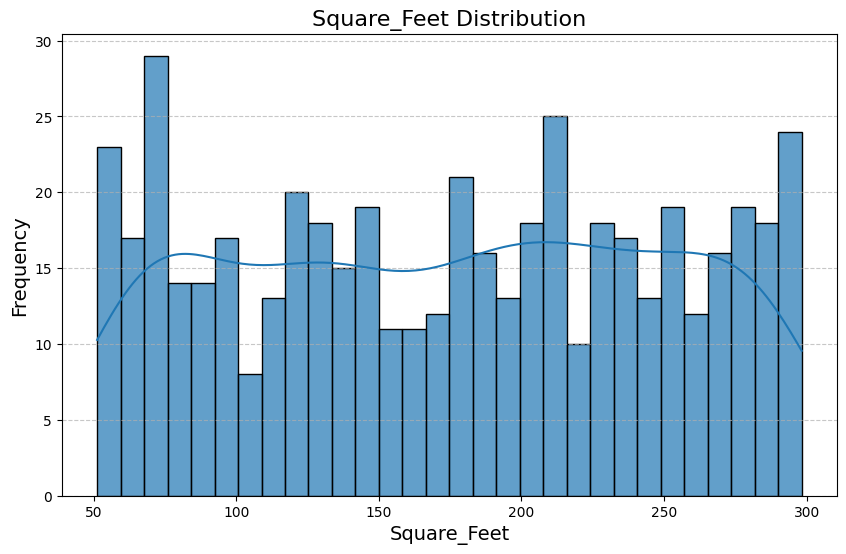

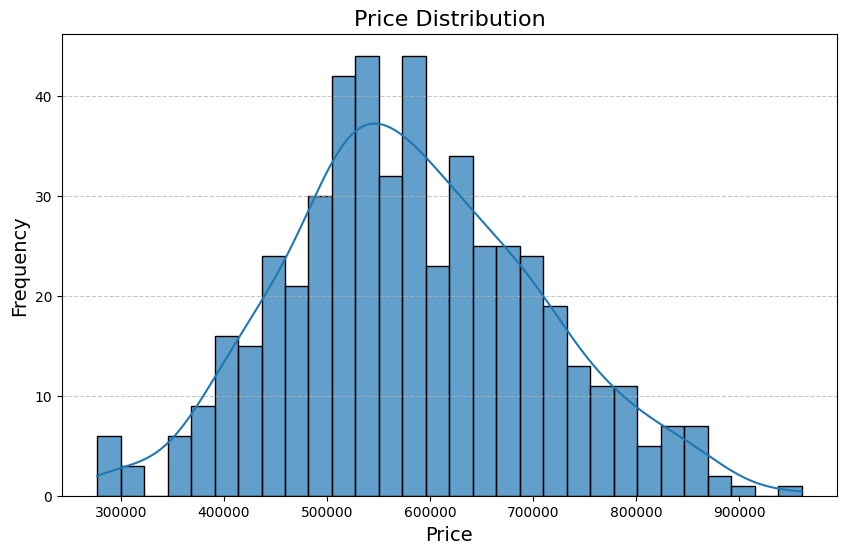

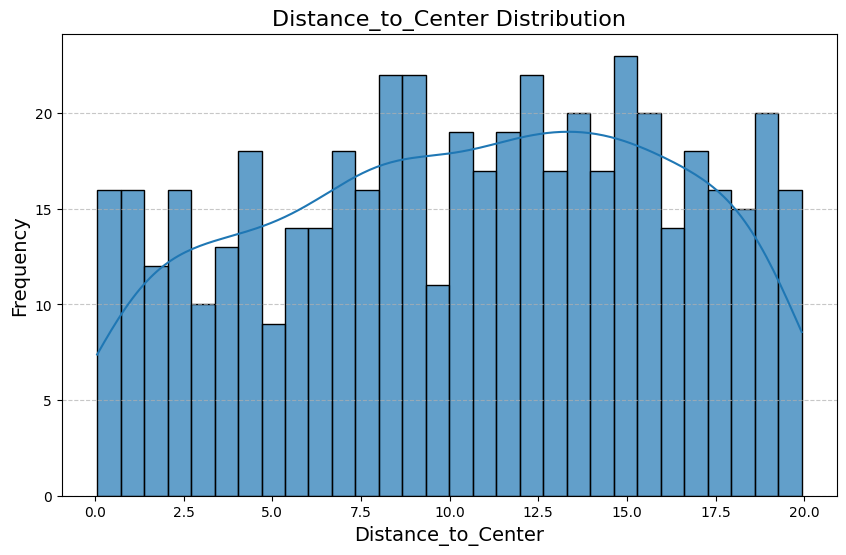

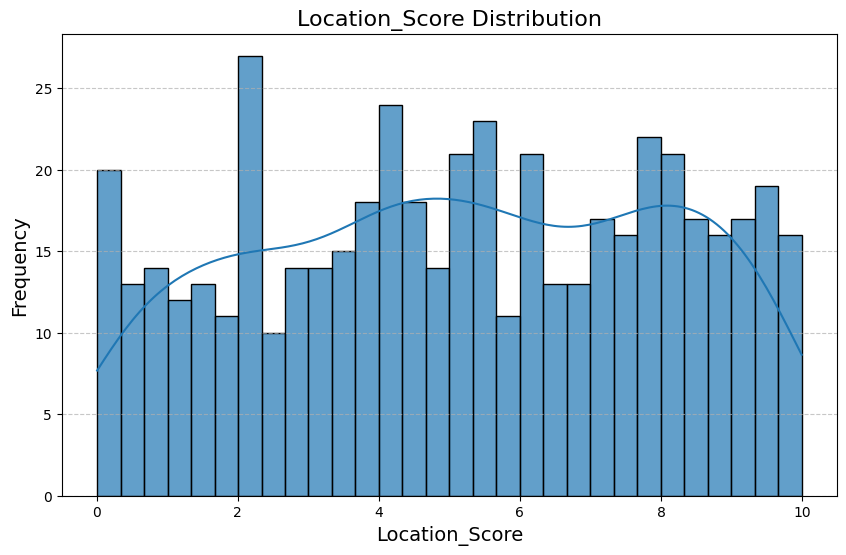

In [ ]:
continuous_columns = ['Square_Feet', 'Price', 'Distance_to_Center', 'Location_Score']

for column in continuous_columns:
  plt.figure(figsize=(10, 6))

  sns.histplot(data[column], kde = True, bins = 30, alpha = 0.7)

  plt.title(f'{column} Distribution', fontsize=16)
  plt.xlabel(column, fontsize = 14)
  plt.ylabel('Frequency', fontsize = 14)
  plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

  plt.show()

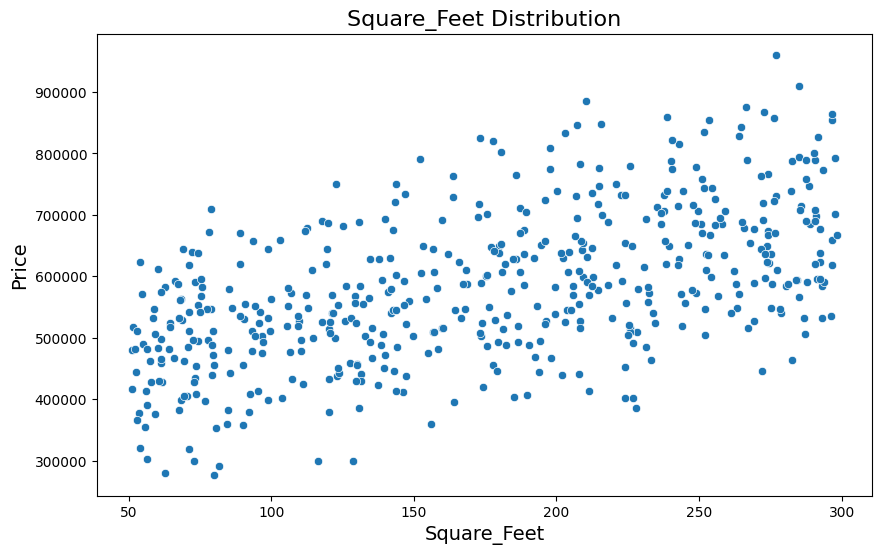

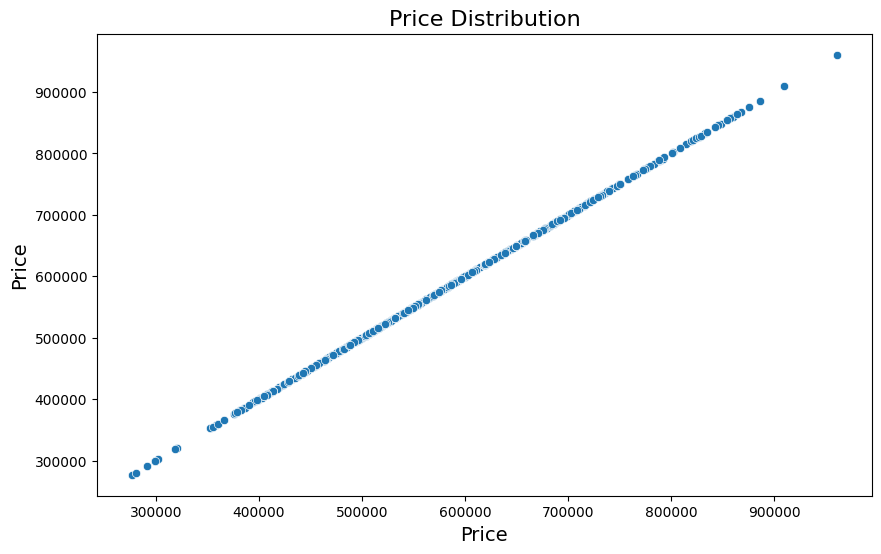

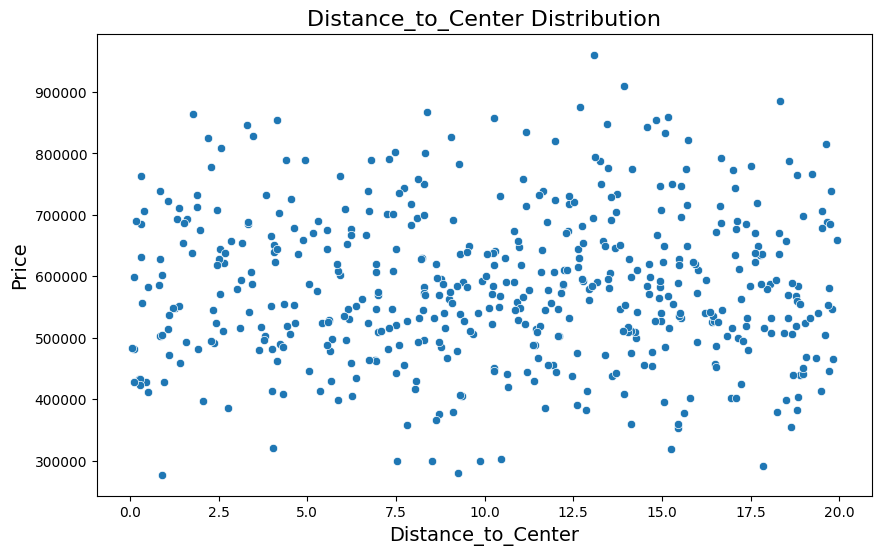

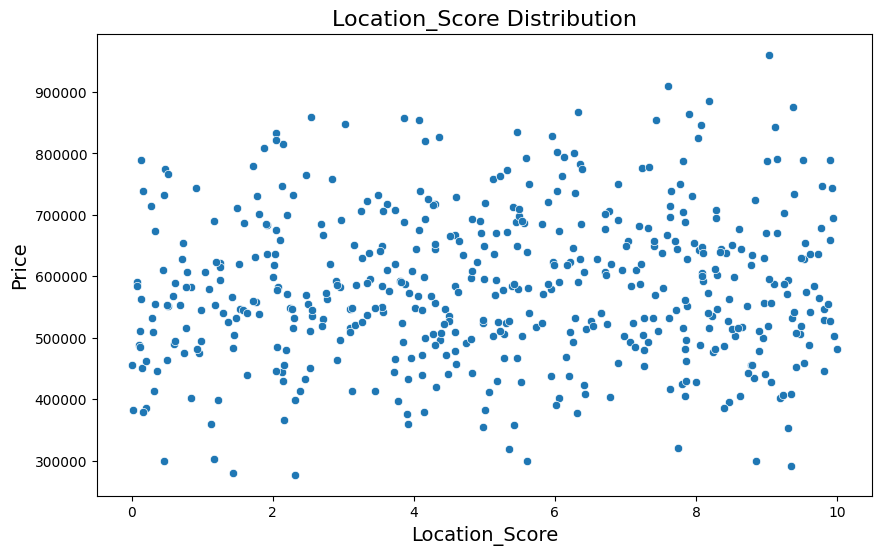

In [ ]:
continuous_columns = ['Square_Feet', 'Price', 'Distance_to_Center', 'Location_Score']

for column in continuous_columns:
  plt.figure(figsize=(10, 6))

  sns.scatterplot(x = data[column], y = data['Price'])

  plt.title(f'{column} Distribution', fontsize=16)
  plt.xlabel(column, fontsize = 14)
  plt.ylabel('Price', fontsize = 14)

  plt.show()

#Feature Engineering
###Before building our model, let's perform some feature engineering to enhance our dataset.

In [ ]:
# Create a new feature: Age of the house
data['House_Age'] = 2025 - data['Year_Built']

# Drop The Year_Built column
data.drop('Year_Built', axis = 1, inplace=True)

#Model Building
###Let's build a linear regression model to predict the price of a house.

In [ ]:
# # Define features and target variable
X = data.drop(['Price'], axis=1)
Y = data['Price']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

#Model Evaluation¶
###Let's evaluate the performance of our model using the test data.

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"MSE: {mse}, r2: {r2}")

MSE: 437730359.7082726, r2: 0.970899139169718


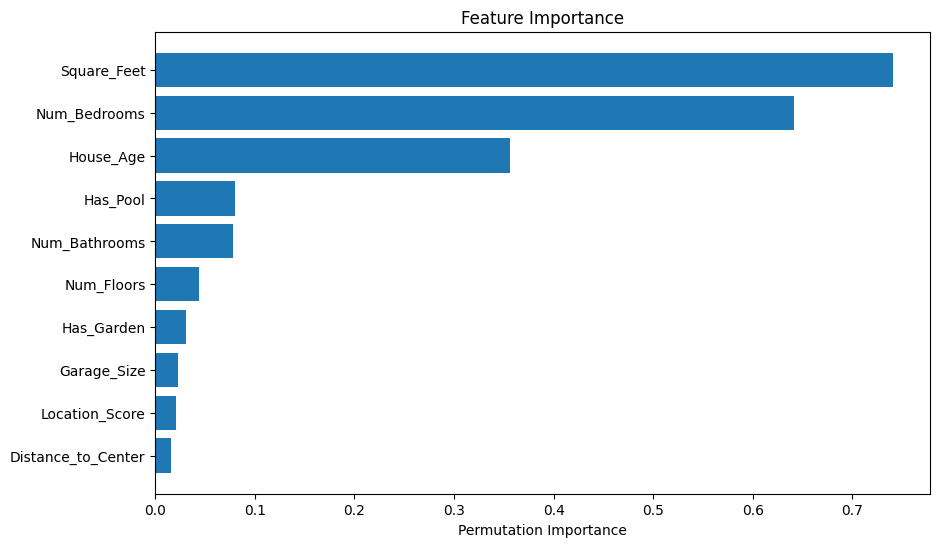

In [ ]:
# Permutation importance
perm_importance = permutation_importance(model, X_test, Y_test, n_repeats = 30, random_state = 42)
sorted_index = perm_importance.importances_mean.argsort()

plt.figure(figsize = (10, 6))
plt.barh(X.columns[sorted_index], perm_importance.importances_mean[sorted_index])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()

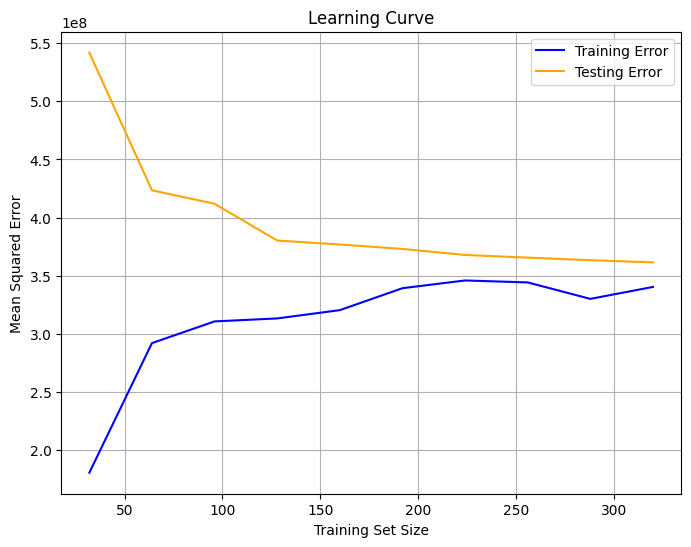

In [ ]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(model, X, Y):
  train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv = 5, scoring='neg_mean_squared_error', n_jobs = -1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
  train_scores_mean = -train_scores.mean(axis = 1)
  test_scores_mean = -test_scores.mean(axis = 1)
  plt.figure(figsize=(8, 6))
  plt.plot(train_sizes, train_scores_mean, label="Training Error", color="blue")
  plt.plot(train_sizes, test_scores_mean, label="Testing Error", color="orange")
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size")
  plt.ylabel("Mean Squared Error")
  plt.legend()
  plt.grid()
  plt.show()

# Plot the learning curve
plot_learning_curve(model, X_train, Y_train)
